Competition Description
Twitter has become an important communication channel in times of emergency.
The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies).

But, it’s not always clear whether a person’s words are actually announcing a disaster. 

Take this example: "Looked at the sky at night yesterday, it was ablaze"

The author explicitly uses the word “ABLAZE” but means it metaphorically. This is clear to a human right away, especially with the visual aid. But it’s less clear to a machine.

In this competition, you’re challenged to build a machine learning model that predicts which Tweets are about real disasters and which one’s aren’t. You’ll have access to a dataset of 10,000 tweets that were hand classified.

In [246]:
import numpy as np 
import pandas as pd 

In [247]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv('test.csv')
df_sample = pd.read_csv('sample_submission.csv')

In [248]:
df_train.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [249]:
df_test.head(10)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


In [250]:
df_sample.head(5)

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [251]:
# Check for null values

df_train.isnull().sum()
df_test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [59]:
# Calling seetviz to get a broad vision about our data

import sweetviz 


resume = sweetviz.analyze(df_train)


resume.show_html('resume.html')

                                             |                                             | [  0%]   00:00 ->…

Report relatorio.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


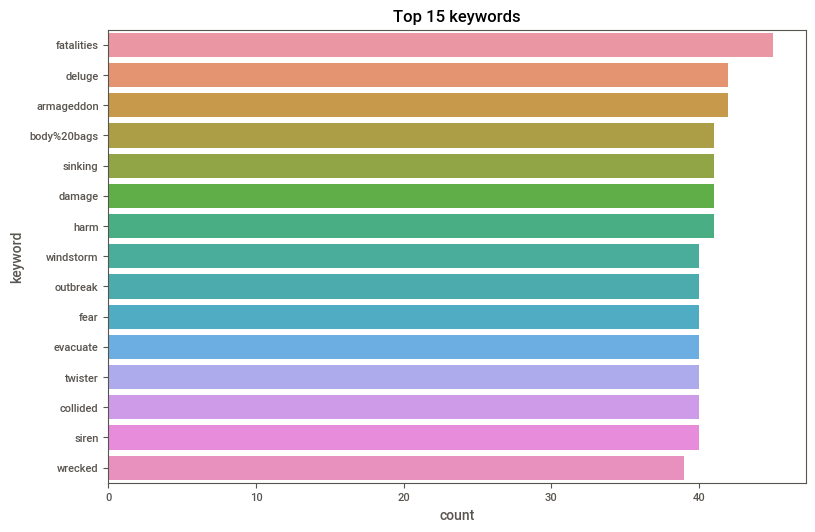

In [252]:
# Most common keywords in train dataset

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('husl')
plt.figure(figsize=(9,6))
sns.countplot(y = df_train.keyword, order= df_train.keyword.value_counts().iloc[:15].index)
plt.title('Top 15 keywords')
plt.show()

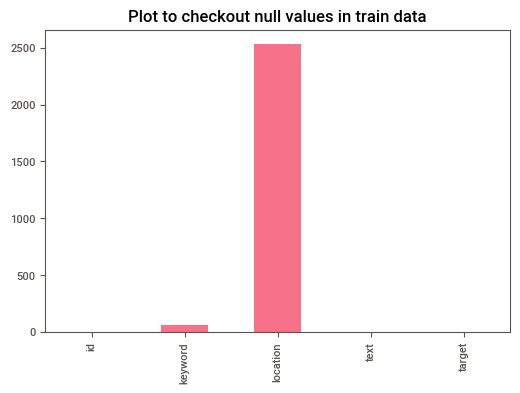

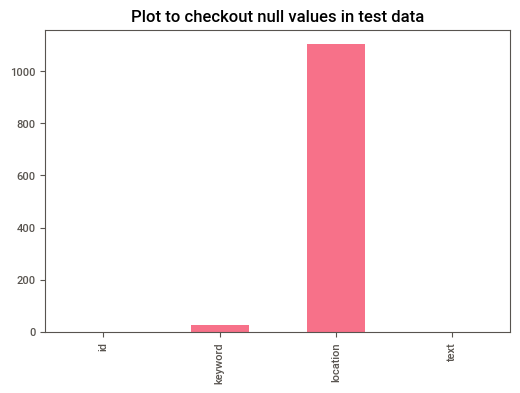

In [253]:
## Plot to checkout null values in train data
df_train.isna().sum().plot(kind = 'bar')
plt.title('Plot to checkout null values in train data')
plt.show()
df_test.isna().sum().plot(kind = 'bar')
plt.title('Plot to checkout null values in test data')
plt.show()

In [254]:
# Since location and keyword have a lot of null values, we can drop them from our data.

df_train = df_train.drop(['location','keyword'],axis=1)
df_test = df_test.drop(['location','keyword'],axis=1)

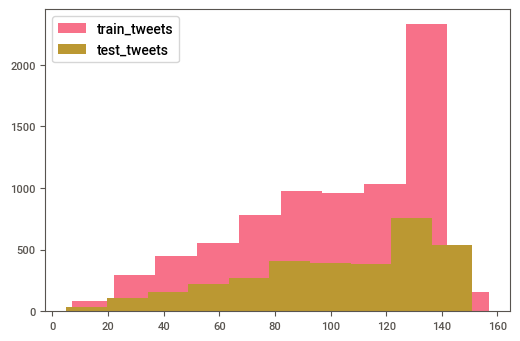

In [255]:
## Plot length of the train and test dataset

plt.hist(df_train['text'].str.len(), label = 'train_tweets')
plt.hist(df_test['text'].str.len(),label = 'test_tweets')
plt.legend()
plt.show()

In [256]:
# We can see that our variable target indicate us what is a disaster tweet (1) and what isn't (0)
# So this is a boolean variable

df_train.sample(20)

,id,text,target
6747,9666,Blonde teen Courtney Laudner teases in her pan...,0
1392,2009,That triumphant moment when you cook up two eg...,0
1355,1956,Ah yes the gays are totally destroying America...,0
1123,1619,I liked a @YouTube video http://t.co/FX7uZZXtE...,0
2101,3018,I tell my cousins I don't wanna hang out and t...,0
2210,3166,China is only delaying the deluge: If the fund...,0
1034,1500,@Deeeznvtzzz bring the body bags tho,0
1872,2691,Only had a crush on one girl in high school an...,0
1367,1971,Insane bush fires in California. Be safe. http...,1
1024,1486,BESTSELLER! Fossil Dawson Mini Cross Body Bag ...,0


In [257]:
df_train.head(16)

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1
5,8,#RockyFire Update => California Hwy. 20 closed...,1
6,10,#flood #disaster Heavy rain causes flash flood...,1
7,13,I'm on top of the hill and I can see a fire in...,1
8,14,There's an emergency evacuation happening now ...,1
9,15,I'm afraid that the tornado is coming to our a...,1


In [258]:
## Checkout a disaster tweet
d_t = df_train[df_train['target'] == 1]['text'] #Print a text from the range 0-8, if equal to 1
for i in range(0,8):
    print(d_t[i])

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
Forest fire near La Ronge Sask. Canada
All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
13,000 people receive #wildfires evacuation orders in California 
Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 
#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires
#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas
I'm on top of the hill and I can see a fire in the woods...


In [265]:
## Checkout a non disaster tweet
nd_t = df_train[df_train['target'] != 1]['text'] #Print a text if different from 1
print(nd_t.head(5)) #it starts from 15 because it is the first row to have a 0

15                  What's up man?
16                   I love fruits
17                Summer is lovely
18               My car is so fast
19    What a goooooooaaaaaal!!!!!!
Name: text, dtype: object


In [266]:
nd_t = df_train[df_train['target'] == 1]['text']
print(nd_t.head(5))

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object


In [267]:
import plotly.express as px
px.pie(df_train,names='target',title='Distribution of tweet categories',hole=0.5)

### Data Cleaning

In [268]:
import re
import string
def clean_text(t):
    # Convert to lower
    t = t.lower()
    # remove html tags
    t = re.sub(r'\[.*?\]',' ', t)
    # remove link
    t = re.sub(r'https?://\S+|www\.\S+',' ', t)
    #remove line breaks
    t = re.sub(r'\n',' ',t)
    #Remove trailing spaces, tabs
    t  = re.sub('\s+',' ',t)
    # remove punctuation
#     t = re.sub('[%s]' % re.escape(string.punctuation), t)
    # Remove special characters
    t = re.sub('\w*\d\w*','',t)
    return t

## Apply clean function on random train string 
test_str = df_train.loc[417, 'text']
print('Original text: '+test_str+'\n')
print('Original text after cleaning: '+clean_text(test_str))

Original text: Arson suspect linked to 30 fires caught in Northern California http://t.co/mmGsyAHDzb

Original text after cleaning: arson suspect linked to  fires caught in northern california 


In [269]:
## Applying clean function on train & test sets
df_train['text'] = df_train['text'].apply(lambda x:clean_text(x))
df_test['text'] = df_test['text'].apply(lambda x:clean_text(x))

## checkout train after cleaning
df_train['text'].head(5)

0    our deeds are the reason of this #earthquake m...
1               forest fire near la ronge sask. canada
2    all residents asked to 'shelter in place' are ...
3    , people receive #wildfires evacuation orders ...
4    just got sent this photo from ruby #alaska as ...
Name: text, dtype: object

### Tokenization

A RegexpTokenizer splits a string into substrings using a regular expression. For example, the following tokenizer forms tokens out of alphabetic sequences, money expressions, and any other non-whitespace sequences:

 from nltk.tokenize import RegexpTokenizer
 s = "Good muffins cost $3.88\nin New York.  Please buy me\ntwo of them.\n\nThanks."
 
 tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
 
 tokenizer.tokenize(s)
 ['Good', 'muffins', 'cost', 'in', 'New', 'York', '.',
'Please', 'buy', 'me', 'two', 'of', 'them', '.', 'Thanks', '.']

In [270]:
# Tokenize the cleaned sentences
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import RegexpTokenizer

# tokenizer=nltk.tokenize.RegexpTokenizer(r'\w+')
tokenizer = RegexpTokenizer(r'\w+')
## Applying tokenization function on train & test sets
df_train['text'] = df_train['text'].map(tokenizer.tokenize)
df_test['text'] = df_test['text'].map(tokenizer.tokenize) ## checkout train dataset tokens
df_train['text'].head(5)

0    [our, deeds, are, the, reason, of, this, earth...
1        [forest, fire, near, la, ronge, sask, canada]
2    [all, residents, asked, to, shelter, in, place...
3    [people, receive, wildfires, evacuation, order...
4    [just, got, sent, this, photo, from, ruby, ala...
Name: text, dtype: object

### Stopwords:
remove unnecessary words that do not carry any meaning

In [271]:
import nltk
#nltk.download('stopwords')

def remove_stopwords(t):
    words = [w for w in t if w not in stopwords.words('english')]
    return words

df_train['text'] =df_train['text'].apply(lambda x: remove_stopwords(x))
df_test['text'] =df_test['text'].apply(lambda x: remove_stopwords(x))

## checkout train dataset without stopwords
df_train['text'].head(5)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    [deeds, reason, earthquake, may, allah, forgiv...
1        [forest, fire, near, la, ronge, sask, canada]
2    [residents, asked, shelter, place, notified, o...
3    [people, receive, wildfires, evacuation, order...
4    [got, sent, photo, ruby, alaska, smoke, wildfi...
Name: text, dtype: object

### Lemmatization
Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item.

Examples of lemmatization:

1.playing, plays and played all these 3 letters will be converted to play after lemmatization

2.change, changing, changes, changed and changer all these letters will be converted to change after lemmatization

In [272]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

def lem_words(t):
    l = WordNetLemmatizer()
    return [l.lemmatize(w) for w in t]

df_train['text'] =df_train['text'].apply(lambda x: lem_words(x))
df_test['text'] =df_test['text'].apply(lambda x: lem_words(x))

## checkout train dataset with lemmatized words
df_train['text'].head(5)

0    [deed, reason, earthquake, may, allah, forgive...
1        [forest, fire, near, la, ronge, sask, canada]
2    [resident, asked, shelter, place, notified, of...
3    [people, receive, wildfire, evacuation, order,...
4    [got, sent, photo, ruby, alaska, smoke, wildfi...
Name: text, dtype: object

In [273]:
## Transform tokens into sentences 

def combine_txt(t):
    c  = ' '.join(t)
    return c

df_train['text'] =df_train['text'].apply(lambda x: combine_txt(x))
df_test['text'] =df_test['text'].apply(lambda x: combine_txt(x))

## checkout train dataset with lemmatized words
df_train['text'].head(5)

0           deed reason earthquake may allah forgive u
1                forest fire near la ronge sask canada
2    resident asked shelter place notified officer ...
3    people receive wildfire evacuation order calif...
4    got sent photo ruby alaska smoke wildfire pour...
Name: text, dtype: object

### Vectorizing text
CountVectorizer is used to transform a given text into a vector on the basis of the frequency(count) of each word that occurs in the entire text.It involves counting the number of occurences each words appears in a document(text)

In [274]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer()
tr_v = c.fit_transform(df_train['text'])
te_v = c.fit_transform(df_test['text'])

print(tr_v[0].todense())

[[0 0 0 ... 0 0 0]]


### TFIDF

TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction.

In [285]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df = 2, max_df = 0.5, ngram_range = (1,2))
tr_t = tfidf.fit_transform(df_train['text'])
te_t = tfidf.transform(df_test['text'])

print(tr_t) #I guess its acts similar to the MinMax Scaler function, I'm not so sure. It does put the data on the same scale.

  (0, 5873)	0.42955610147525586
  (0, 3669)	0.44400693678814745
  (0, 217)	0.38352901903597114
  (0, 5872)	0.2748610561491046
  (0, 2821)	0.30473436177503666
  (0, 7691)	0.3251016702154227
  (0, 2367)	0.44400693678814745
  (1, 3508)	0.48444913925709776
  (1, 3660)	0.38022430288954495
  (1, 1420)	0.4245572189856818
  (1, 5208)	0.38854833425014584
  (1, 6360)	0.3449659961644528
  (1, 3481)	0.24109477175958982
  (1, 3659)	0.3352486289968323
  (2, 3169)	0.26612437031001007
  (2, 6786)	0.23303232956162295
  (2, 3083)	0.22163991769797922
  (2, 6653)	0.24155906092908158
  (2, 7147)	0.48311812185816316
  (2, 8457)	0.6051076137408071
  (2, 559)	0.28749423825749343
  (2, 7866)	0.29186887289666186
  (3, 3089)	0.4435514828166325
  (3, 1374)	0.3034694526470505
  (3, 10443)	0.32609893512294774
  :	:
  (7611, 6522)	0.16532140719718788
  (7611, 9453)	0.17799717676076518
  (7611, 4856)	0.16229680853699543
  (7611, 8373)	0.16532140719718788
  (7611, 5534)	0.13694526940984086
  (7611, 4777)	0.12500781491

## Observations:
The data cleaning step of a data focused on the text analysis, with few columns, is very different
from a data with a lot of variables with numeric info. Thus, the algorithms we are going to use for machine 
learning may not be the ones we implement on a price prediction, for example.

#### Always good to remember this sheet:

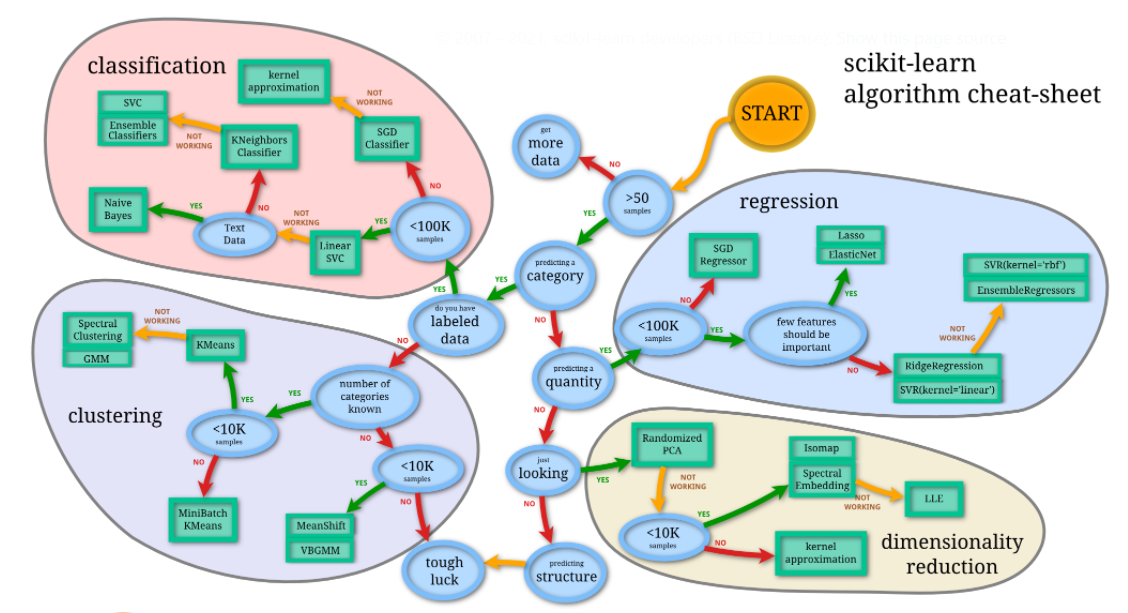

In [88]:
from IPython.display import Image
Image("skl_cheat_sheet.png")

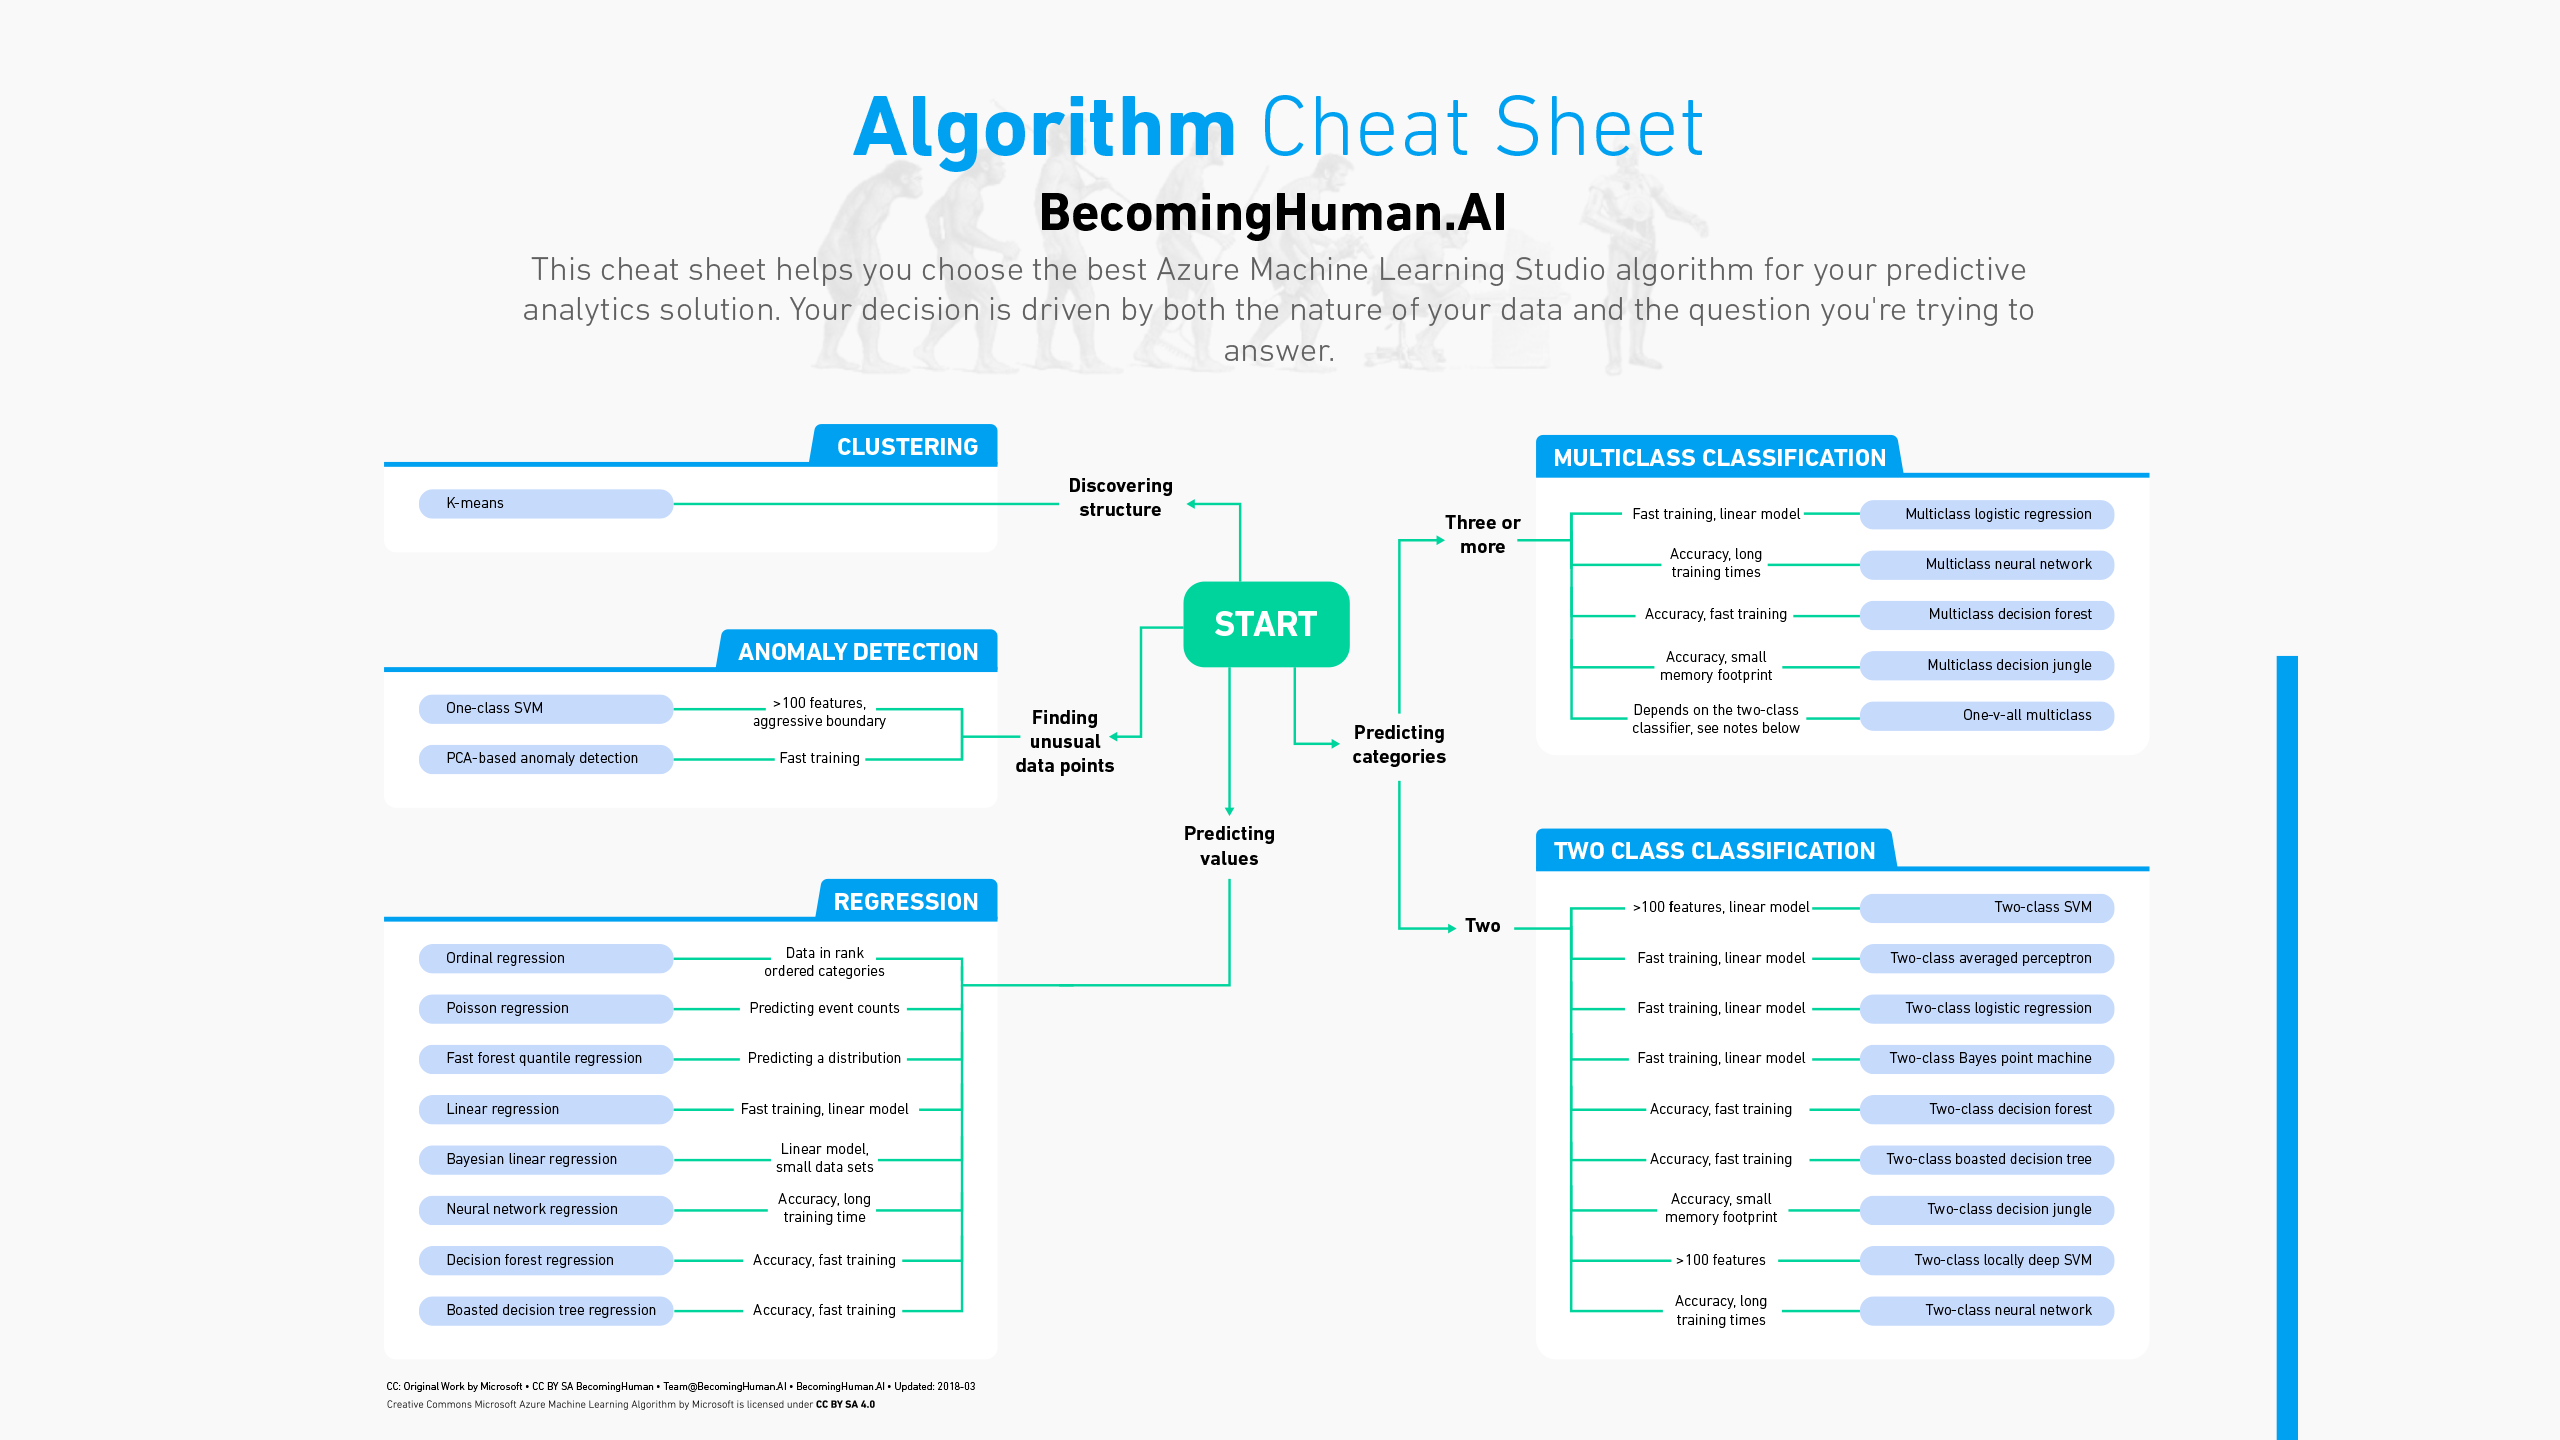

In [86]:
Image("algorithms.png")

### XGB Classifier:
XGBoost is an algorithm that has recently been dominating applied machine learning and Kaggle competitions for structured or tabular data. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance

In [276]:
import xgboost as xg
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

param = xg.XGBClassifier(max_depth = 5, n_estimators = 500,
                        learning_rate = 0.08, nthread = 10, colsample_bytree = 0.8, eval_metric = "logloss")

XGB_vector_score = cross_val_score(param, tr_v, df_train['target'],
                              cv=5, scoring='f1')
print("Vector score: ", XGB_vector_score)

XGB_tfidf_score = cross_val_score(param, tr_t, df_train['target'],
                              cv=5, scoring='f1')
print("\nTFIDF score: ", XGB_tfidf_score)

Vector score:  [0.50638298 0.40636704 0.49578415 0.40161453 0.56742557]

TFIDF score:  [0.49455338 0.39425837 0.48713551 0.40162272 0.57444934]


### Logistic Regression:

There are lots of classification problems that are available, but the logistics regression is common and is an useful regression method for solving the binary classification problem

In [277]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
LR_vector_score = cross_val_score(lg, tr_v, df_train['target'],
                              cv=5, scoring='f1')
print("LR_Vector score: ", LR_vector_score)

LR_tfidf_score = cross_val_score(lg, tr_t, df_train['target'],
                              cv=5, scoring='f1')
print("\nLR_TFIDF score: ", LR_tfidf_score)

LR_Vector score:  [0.62655205 0.52433817 0.6035313  0.52847806 0.7057903 ]

LR_TFIDF score:  [0.5623069  0.5013876  0.56862745 0.42629905 0.67244367]


### Naive Bayes:

Naive Bayes is the most straightforward and fast classification algorithm, which is suitable for a large chunk of data. Naive Bayes classifier is successfully used in various applications such as spam filtering, text classification, sentiment analysis, and recommender systems. It uses Bayes theorem of probability for prediction of unknown class.

In [278]:
from sklearn.naive_bayes import MultinomialNB as mb

m = mb()
NB_vector_score = cross_val_score(m, tr_v, df_train['target'],
                              cv=5, scoring='f1')
print("NB_Vector score: ", vector_score)

NB_tfidf_score = cross_val_score(m, tr_t, df_train['target'],
                              cv=5, scoring='f1')
print("\nNB_TFIDF score: ", tfidf_score)

NB_Vector score:  [0.64227642 0.61965812 0.67412587 0.6407465  0.73404255]

NB_TFIDF score:  [0.57838364 0.58523726 0.62139219 0.59797608 0.74842767]


### Converting Score arrays to Data frames, I guess it's better to plot

In [279]:
XGB_V = pd.DataFrame(XGB_vector_score, 
             columns=['XGB_Vector Score'])

LR_V = pd.DataFrame(LR_vector_score, 
             columns=['LR_Vector Score'])

NB_V = pd.DataFrame(NB_vector_score, 
             columns=['NB_Vector Score'])

FULL_V = pd.concat([XGB_V ,LR_V, NB_V], axis=1, join="inner")
print("\n",FULL_V)


    XGB_Vector Score  LR_Vector Score  NB_Vector Score
0          0.506383         0.626552         0.642799
1          0.406367         0.524338         0.617249
2          0.495784         0.603531         0.674126
3          0.401615         0.528478         0.640125
4          0.567426         0.705790         0.732713


### Plot the Vector scores to compare

Text(0, 0.5, 'Score')

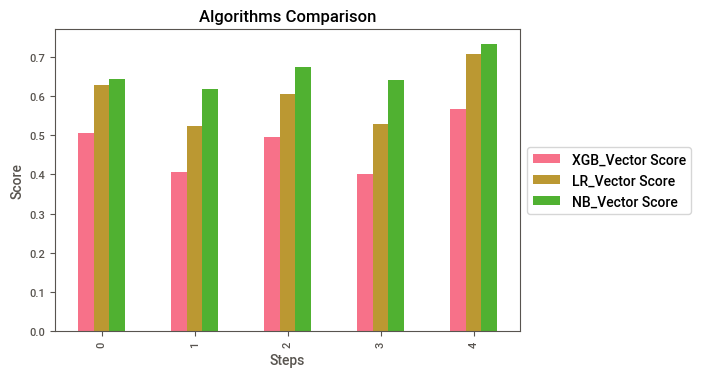

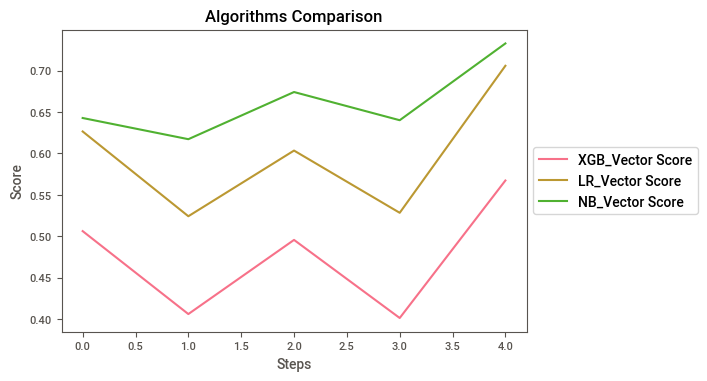

In [280]:
FULL_V.plot(kind="bar").legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Algorithms Comparison")
plt.xlabel("Steps")
plt.ylabel("Score")

FULL_V.plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Algorithms Comparison")
plt.xlabel("Steps")
plt.ylabel("Score")

In [281]:
XGB_TFIDF = pd.DataFrame(XGB_tfidf_score, 
             columns=['XGB_TF Score'])

LR_TFIDF = pd.DataFrame(LR_tfidf_score, 
             columns=['LR_TFr Score'])

NB_TFIDF = pd.DataFrame(NB_tfidf_score, 
             columns=['NB_TF Score'])

FULL_TF = pd.concat([XGB_TFIDF,LR_TFIDF,NB_TFIDF], axis=1, join="inner")
print("\n",FULL_TF)


    XGB_TF Score  LR_TFr Score  NB_TF Score
0      0.494553      0.562307     0.578947
1      0.394258      0.501388     0.585237
2      0.487136      0.568627     0.621392
3      0.401623      0.426299     0.597976
4      0.574449      0.672444     0.748428


### Plot the TFIDF scores to compare

Text(0, 0.5, 'Score')

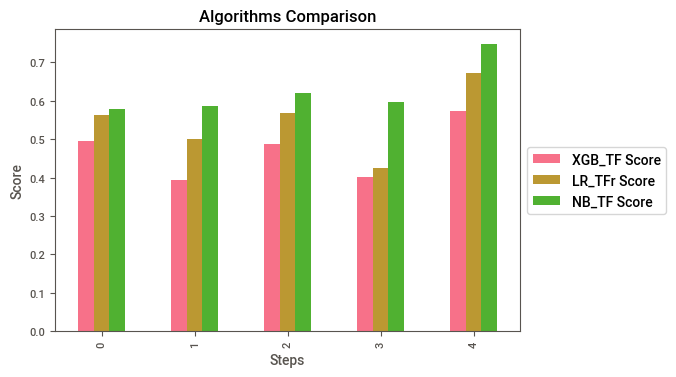

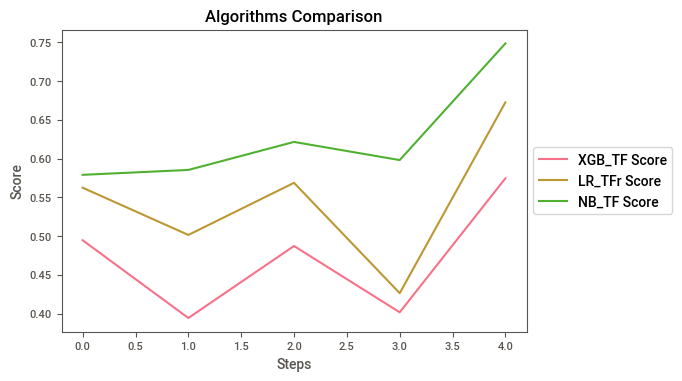

In [282]:
FULL_TF.plot(kind="bar").legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Algorithms Comparison")
plt.xlabel("Steps")
plt.ylabel("Score")

FULL_TF.plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Algorithms Comparison")
plt.xlabel("Steps")
plt.ylabel("Score")

As we can see, Naive Bayes has the best results by far, so no we are going to submit.

### Prediction

In [283]:
m.fit(tr_t,df_train['target'])
pred = m.predict(te_t)

###  Submission to Kaggle

In [284]:
s = pd.DataFrame({'Id':df_test['id'],
                 'Target':pred})
s.to_csv('s.csv',index = False)
s = pd.read_csv('s.csv')
s.head(5)

,Id,Target
0,0,1
1,2,0
2,3,1
3,9,1
4,11,1
